In [153]:
import pylab as pl
import pykat
import numpy as np
% matplotlib inline
import matplotlib as plt

In [154]:
katfile = 'Tcav_RFjitter.kat'

basekat = pykat.finesse.kat()

basekat.loadKatFile(katfile)

# PDH signal
# kat = basekat.deepcopy()

# kat.parseCommands("xaxis MC2 phi lin -90 90 180")

# out=kat.run()
# pl.figure()
# pl.plot(out.x,out['PDREFLPDH_I'], label='PDH I')
# pl.plot(out.x,out['PDREFLPDH_Q'], label='PDH Q')
# pl.legend()
# pl.xlabel('MC2 tuning [deg]')
# pl.ylabel('Error signal [W]')
# pl.grid()


--------------------------------------------------------------
Running kat - Started at 2016-01-20 19:28:01.256387

Finished in 0:00:00.481602
--------------------------------------------------------------
Running kat - Started at 2016-01-20 19:28:01.775555

Finished in 0:00:00.071002
--------------------------------------------------------------
Running kat - Started at 2016-01-20 19:28:01.880323

Finished in 0:00:00.101036
--------------------------------------------------------------
Running kat - Started at 2016-01-20 19:28:02.014941

Finished in 0:00:00.067663
--------------------------------------------------------------
Running kat - Started at 2016-01-20 19:28:02.126147

Finished in 0:00:00.042777


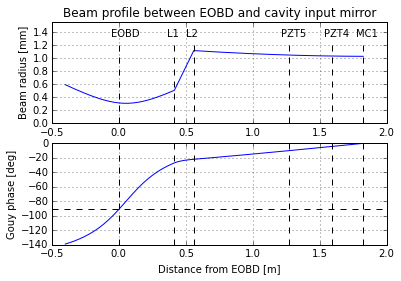

In [155]:
# plot beam size and Gouy phase over the distance between EOBD and L1

um=1e6
mm=1e3

sEOBDtoL1 = basekat.sEOBDtoL1.L.value
sL1toL2 = basekat.sL1toL2.L.value
sL2toPZT5 = basekat.sL2toPZT5.L.value
sPZT5toPZT4 = basekat.sPZT5toPZT4.L.value
sPZT4toMC1 = basekat.sPZT4toMC1.L.value

kat=basekat.deepcopy()
text=("""
bp wx_at_EOBD x w nEOBDout
bp wy_at_EOBD y w nEOBDout
gouy gouyx x sEOBDtoL1
gouy gouyy y sEOBDtoL1
xaxis sEOBDtoL1 l lin 0 %g 45""") % (sEOBDtoL1+0.4)
kat.parseCommands(text)
out1=kat.run()
out1_z = sEOBDtoL1-out1.x[::-1]
gouyxmax1=max(out1['gouyx'])

kat=basekat.deepcopy()
text=("""
bp wx_at_L1 x w nL1out
bp wy_at_L1 y w nL1out
gouy gouyx x sL1toL2
gouy gouyy y sL1toL2
xaxis sL1toL2 l lin 0 %g 15""") % sL1toL2
kat.parseCommands(text)

out2=kat.run()
out2_z = sL1toL2-out2.x[::-1] + max(out1_z)
gouyxmax2=max(out2['gouyx'])

kat=basekat.deepcopy()
text=("""
bp wx_at_L2 x w nL2out
bp wy_at_L2 y w nL2out
gouy gouyx x sL2toPZT5
gouy gouyy y sL2toPZT5
xaxis sL2toPZT5 l lin 0 %g 69""") % sL2toPZT5

kat.parseCommands(text)

out3=kat.run()
out3_z = sL2toPZT5-out3.x[::-1] + max(out2_z)
gouyxmax3=max(out3['gouyx'])

kat=basekat.deepcopy()
text=("""
bp wx_at_PZT5 x w nPZT5refl
bp wy_at_PZT5 y w nPZT5refl
gouy gouyx x sPZT5toPZT4
gouy gouyy y sPZT5toPZT4
xaxis sPZT5toPZT4 l lin 0 %g 32""") % sPZT5toPZT4

kat.parseCommands(text)
out4=kat.run()
out4_z = sPZT5toPZT4-out4.x[::-1] + max(out3_z)
gouyxmax4=max(out4['gouyx'])

kat=basekat.deepcopy()
text=("""
bp wx_at_MC1 x w nPZT4refl
bp wy_at_MC1 y w nPZT4refl
gouy gouyx x sPZT4toMC1
gouy gouyy y sPZT4toMC1
xaxis sPZT4toMC1 l lin 0 %g 24""") % sPZT4toMC1

kat.parseCommands(text)

kat.saveScript('check.kat')

out5=kat.run()
out5_z = sPZT4toMC1-out5.x[::-1] + max(out4_z)
gouyxmax5=max(out5['gouyx'])

out_z = np.hstack((out1_z,out2_z,out3_z,out4_z,out5_z))
out_wx = np.hstack((out1['wx_at_EOBD'][::-1],out2['wx_at_L1'][::-1],out3['wx_at_L2'][::-1],out4['wx_at_PZT5'][::-1],out5['wx_at_MC1'][::-1]))*mm

out_gouyx = -np.hstack((out1['gouyx'][::-1]+gouyxmax2+gouyxmax3+gouyxmax4+gouyxmax5,
                      out2['gouyx'][::-1]+gouyxmax3+gouyxmax4+gouyxmax5,
                      out3['gouyx'][::-1]+gouyxmax4+gouyxmax5,
                      out4['gouyx'][::-1]+gouyxmax5,
                      out5['gouyx'][::-1]))
label_h=max(out_wx)*1.2
label_hoff=-0.05

pl.figure()
pl.subplot(211)
pl.plot(out_z,out_wx, label='xaxis')
pl.ylabel('Beam radius [mm]')
pl.ylim((0,max(out_wx)*1.4))
pl.axvline(0,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='EOBD',xy=(0+label_hoff,label_h))
pl.axvline(sEOBDtoL1,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='L1',xy=(sEOBDtoL1+label_hoff,label_h))
pl.axvline(sEOBDtoL1+sL1toL2,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='L2',xy=(sEOBDtoL1+sL1toL2+label_hoff,label_h))
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='PZT5',xy=(sEOBDtoL1+sL1toL2+sL2toPZT5+label_hoff,label_h))
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='PZT4',xy=(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4+label_hoff,label_h))
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4+sPZT4toMC1,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='MC1',xy=(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4+sPZT4toMC1+label_hoff,label_h))
pl.grid()
pl.title('Beam profile between EOBD and cavity input mirror')

pl.subplot(212)
pl.plot(out_z,out_gouyx, label='xaxis')
pl.xlabel('Distance from EOBD [m]')
pl.ylabel('Gouy phase [deg]')
pl.axvline(0,linestyle='--',color='k')
pl.axvline(sEOBDtoL1,linestyle='--',color='k')
pl.axvline(sEOBDtoL1+sL1toL2,linestyle='--',color='k')
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5,linestyle='--',color='k')
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4,linestyle='--',color='k')
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4+sPZT4toMC1,linestyle='--',color='k')
pl.axhline(-90,linestyle='--',color='k')
pl.grid()
pl.savefig('EOBDtoMC1profile.pdf')

In [156]:
# Calculate some useful beam parameters

kat=basekat.deepcopy()
kat.parseCommands('bp w0atEOBD x w0 nEOBDout')
kat.noxaxis=True
out=kat.run()

print 'waist size at EOBD is '+str(out['w0atEOBD']*um)+'um'
print 'divergence angle at EOBD is '+str(1064e-9/pl.pi/out['w0atEOBD']*1000)+' mrad'

kat=basekat.deepcopy()
kat.parseCommands('bp w0cav x w0 nMC2in')
kat.noxaxis=True
out=kat.run()

print 'waist size at EOBD is '+str(out['w0cav']*um)+'um'
print 'divergence angle of cavity waist is '+str(1064e-9/pl.pi/out['w0cav']*1000)+' mrad'


--------------------------------------------------------------
Running kat - Started at 2016-01-20 19:28:02.899282

Finished in 0:00:00.052883
waist size at EOBD is 303.741837938um
divergence angle at EOBD is 1.1150315057 mrad
--------------------------------------------------------------
Running kat - Started at 2016-01-20 19:28:02.976261

Finished in 0:00:00.053815
waist size at EOBD is 1026.79684161um
divergence angle of cavity waist is 0.3298429691 mrad


In [157]:
# calculate PZT pitch tilt degree of freedom 
sMC1toMC3 = basekat.sMC1toMC3.L.value
d_PZT5to_cavw0 = sPZT5toPZT4 + sPZT4toMC1 + 0.5*sMC1toMC3
d_PZT4to_cavw0 = sPZT4toMC1 + 0.5*sMC1toMC3
drive_ratio = d_PZT5to_cavw0/d_PZT4to_cavw0
print "PZT4 must be driven "+str(drive_ratio)+" times harder than PZT5 to get tilt only"


PZT4 must be driven 2.1149825784 times harder than PZT5 to get tilt only


--------------------------------------------------------------
Running kat - Started at 2016-01-20 19:28:07.295502

Finished in 0:00:02.507508
HG01 mode is resonant at 14730000.0 Hz


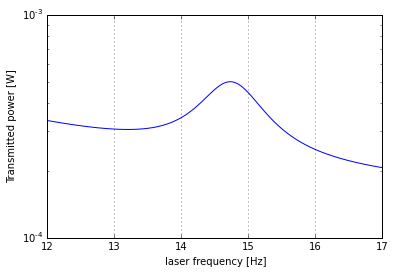

In [158]:
# Check resonance frequency of HG01 mode
MHz=1e-6

kat = basekat.deepcopy()

kat.parseCommands("""
attr PZT5 ybeta 10u
pd PDtrans nMCTRANS
xaxis laser f lin 12M 17M 5000""")

out=kat.run()

pl.figure()
pl.semilogy(out.x*MHz,out['PDtrans'])
pl.xlabel('laser frequency [Hz]')
pl.ylabel('Transmitted power [W]')
pl.grid()
xs=out.x
maxval=max(out['PDtrans'])
index_max=out['PDtrans'].argmax()
max_f=xs[index_max]
print "HG01 mode is resonant at "+str(max_f)+" Hz"
#checkvec=out['PDtrans']-maxval


In [160]:
# Check ratio of alignment error signal responses or two DOFs at 14730000 Hz jitter frequency

kat = basekat.deepcopy()

Iphase = 70.25

Qphase = Iphase - 90

text=("""
fsig translation PZT5 ybeta $fdither 0 1
fsig translation PZT4 ybeta $fdither 180 1

pd2 ASCPDREFL_I $fjitter %g $fdither 0 nPDREFLin
pd2 ASCPDREFL_Q $fjitter %g $fdither 0 nPDREFLin
""") % (Iphase, Qphase)

kat.parseCommands(text)
kat.noxaxis=True
out=kat.run()
print "I-phase response to translation = " +str(out['ASCPDREFL_I'])+" W/rad on PZT5"
print "Q-phase response to translation = " +str(out['ASCPDREFL_Q'])+" W/rad on PZT5"

#print "Quadrature sum of responses = "+str(out['ASCPDREFL_I']+out['ASCPDREFL_Q'])

kat = basekat.deepcopy()

text=("""
fsig tilt PZT5 ybeta $fdither 0 1
fsig tilt PZT4 ybeta $fdither 180 %g

pd2 ASCPDREFL_I $fjitter %g $fdither 0 nPDREFLin
pd2 ASCPDREFL_Q $fjitter %g $fdither 0 nPDREFLin
""") % (drive_ratio, Iphase, Qphase)

kat.parseCommands(text)
kat.noxaxis=True
out=kat.run()
print "I-phase response to tilt = " +str(out['ASCPDREFL_I'])+" W/rad on PZT5"
print "Q-phase response to tilt = " +str(out['ASCPDREFL_Q'])+" W/rad on PZT5"

#print "Quadrature sum of responses = "+str(out['ASCPDREFL_I']+out['ASCPDREFL_Q'])


--------------------------------------------------------------
Running kat - Started at 2016-01-20 19:28:52.048616
** Warning: name 'translation' already used. This may cause confusion.

Finished in 0:00:00.482659
I-phase response to translation = -0.000176264108907 W/rad on PZT5
Q-phase response to translation = 0.0697129841328 W/rad on PZT5
Quadrature sum of responses = 0.0695367200239
--------------------------------------------------------------
Running kat - Started at 2016-01-20 19:28:52.568161
** Warning: name 'tilt' already used. This may cause confusion.

Finished in 0:00:00.078337
I-phase response to tilt = 0.777616837264 W/rad on PZT5
Q-phase response to tilt = -0.0288423041982 W/rad on PZT5
